# Modeling Tumor Growth with Logistic Growth: A Comparison of Euler and Runge-Kutta Methods"

For this project, I have chosen to model the growth of a tumor using the logistic growth equation, which is an ordinary differential equation (ODE) that describes how a population grows in an environment with limited resources. The logistic growth model is given by:

$$\frac{dy}{dt} = ry \left(1 - \frac{y}{K}\right), \quad y(0) = y_0$$


In this context, the variables are interpreted as follows:

- $y(t)$ : The size of tumor at time t, meausured in millions of cells.

- $r$ : The intrinsic growth rate of the tumor cells, representing how quickly the tumor grows under ideal conditions.

- $K$ : The carrying capacity, which is the maximum tumor size the environment can support, limited by factors such as blood supply, space, or immune response.

- $y_0$ :  The initial tumor size at $t=0$, representing the size of the tumor when it is first detected.

### Chosen Parameters:
I have selected the following parameters to reflect a realistic tumor growth scenario, inspired by studies of aggressive cancers such as burkitt lymphoma _(“Mean Doubling Time of the Fastest Growing Tum - Human Homo Sapiens - BNID 105219”)_:

- Growth rate $(r) : r = 0.1$, which corresponds to a $10$% growth rate per day. This is a reasonable value for a fast-growing tumor, as aggressive cancers can double in size over short periods when resources are abundant.

- Carrying capacity $(K): K = 1000$, representing a maximum tumor size of $1000$ million cells. This could also be interpreted as $1000 mm³$ (approximately $1 cm³$), a size at which tumor growth often slows due to limitations in blood supply or other resources.

- Initial tumor size $(y_0): y_0 = 10$, meaning the tumor starts with $10$ million cells (or $10 mm³$). This represents a small, detectable tumor, as tumors are often first identified at sizes around 1–10 mm³ in medical imaging.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Logistic Growth Function
def f(t, y, r=0.1, K=1000):
    return r * y * (1 - y / K)

- $t0$: Initial time - $0$ 
- $tf$: Final time - $50$ days
- $y0$: Initial size of the tumor size - $10$ million cells.
- $h$: Step size for the numerical approximation - $[0.1, 0.5, 1.0, 2.0, 5.0]$
- $r$ : growth rate if tumor cells - $0.1$
- $K$ : carrying capacity in a logistic growth model - $1000$ million cells

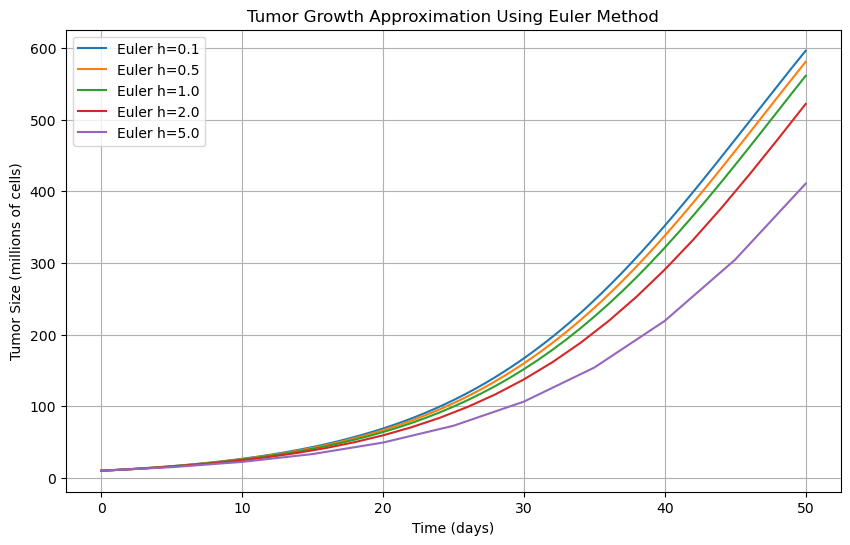

In [3]:
# Euler method implementation

def euler_method(t0, tf, y0, h, r=0.1, K=1000):
    t_values = np.arange(t0, tf + h, h) 
    y_values = [y0]
    # Compute y values using Euler method (O(h))
    for t in t_values[:-1]:
        y_next = y_values[-1] + h * f(t, y_values[-1], r, K)
        y_values.append(y_next)
    return t_values, np.array(y_values)


# Parameters
t0, tf = 0, 50  # Time interval [0, 50] days
y0 = 10  # Initial tumor size (10 million cells)
step_sizes = [0.1, 0.5, 1.0, 2.0, 5.0]  # 5 different step size for different approximations within the interval

# Plotting Tumor Growth Approximation Using Euler Method
plt.figure(figsize=(10, 6))
for h in step_sizes:
    t_values, y_values = euler_method(t0, tf, y0, h)
    plt.plot(t_values, y_values, label=f'Euler h={h}')

plt.xlabel('Time (days)')
plt.ylabel('Tumor Size (millions of cells)')
plt.title('Tumor Growth Approximation Using Euler Method')
plt.legend()
plt.grid(True)
plt.show()



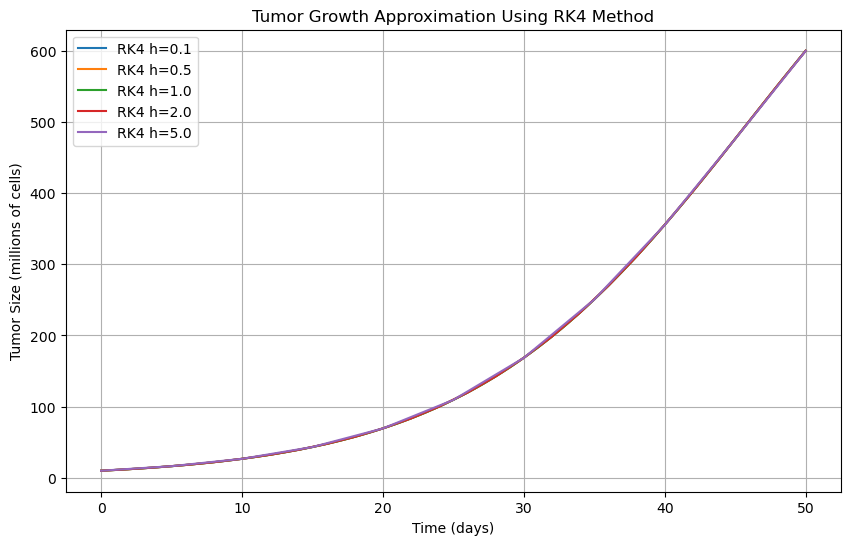

In [4]:
# RK4 method implementation
def rk4_method(t0, tf, y0, h, r=0.1, K=1000): 
    t_values = np.arange(t0, tf + h, h) # Time values
    y_values = [y0] # Initial condition
    for t in t_values[:-1]: 
        y_n = y_values[-1]
        # Compute slopes (O(h^4) accuracy)
        k1 = f(t, y_n, r, K) 
        k2 = f(t + h/2, y_n + (h/2) * k1, r, K) 
        k3 = f(t + h/2, y_n + (h/2) * k2, r, K)
        k4 = f(t + h, y_n + h * k3, r, K)
        y_next = y_n + (h/6) * (k1 + 2*k2 + 2*k3 + k4) # Compute next y value using weighted average
        y_values.append(y_next) # Append next y value to list and repeat the process for each step size(h)
    return t_values, np.array(y_values) 

# Parameters for the RK4 method 
t0, tf = 0, 50  # Time interval [0, 50] days
y0 = 10  # Initial tumor size
step_sizes = [0.1, 0.5, 1.0, 2.0, 5.0]  # 5 different step sizes

# Plotting Tumor Growth Approximation Using RK4 Method
plt.figure(figsize=(10, 6))
for h in step_sizes:
    t_rk4, y_rk4 = rk4_method(t0, tf, y0, h)
    plt.plot(t_rk4, y_rk4, label=f'RK4 h={h}')

plt.xlabel('Time (days)')
plt.ylabel('Tumor Size (millions of cells)')
plt.title('Tumor Growth Approximation Using RK4 Method')
plt.legend()
plt.grid(True)
plt.show()

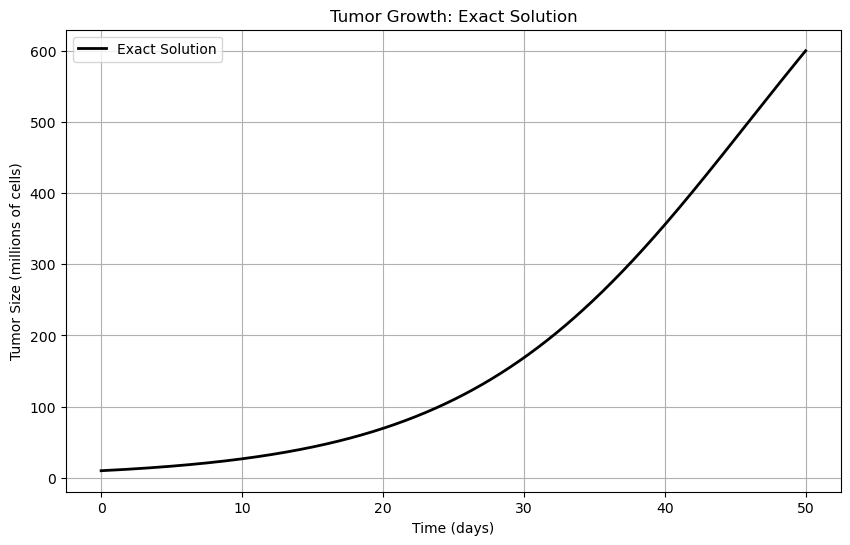

In [5]:
# Implement Exact solution for comparison
def exact_solution(t, y0=10, r=0.1, K=1000):
    return (K * y0 * np.exp(r * t)) / (K + y0 * (np.exp(r * t) - 1))

# Parameters
t0, tf = 0, 50  # Time interval [0, 50] days

# Compute exact solution 
t_exact = np.linspace(t0, tf, 1000) 
y_exact = exact_solution(t_exact)

# Plotting Exact Solution
plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact, 'k-', label='Exact Solution', linewidth=2)


plt.xlabel('Time (days)')
plt.ylabel('Tumor Size (millions of cells)')
plt.title('Tumor Growth: Exact Solution')
plt.legend()
plt.grid(True)
plt.show()


## Error vs Step Size representation for both Euler and Runge-Kutta4

Step Size | Euler Error (Max Absolute) in Millions
----------|------------------------------------------
      0.1 |               4.032651
      0.5 |              20.090772
      1.0 |              39.986965
      2.0 |              79.109608
      5.0 |             189.311444

Step Size | RK4 Error (Max Abs) in Millions
----------|----------------------------------
      0.1 |           0.000000
      0.5 |           0.000032
      1.0 |           0.000498
      2.0 |           0.007432
      5.0 |           0.235198


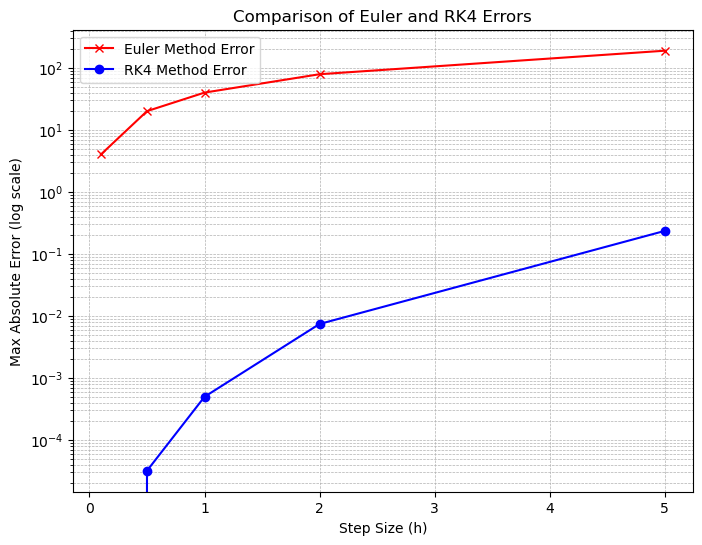

In [6]:
# Compute errors for Euler method
euler_errors = []
for h in step_sizes:
    t_values, y_values = euler_method(t0, tf, y0, h)
    y_exact_interp = np.interp(t_values, t_exact, y_exact)  # Interpolate exact solution for Euler time values
    error = np.max(np.abs(y_values - y_exact_interp))  # Compute max absolute error by subtracting the interpolated exact solution from the Euler approximation
    euler_errors.append(error)

# Print error table for Euler method
print("Step Size | Euler Error (Max Absolute) in Millions")
print("----------|------------------------------------------")
for h, error in zip(step_sizes, euler_errors):
    print(f"{h:>9.1f} | {error:>22.6f}")

print()


# Compute errors for RK4
rk4_errors = []
for h in step_sizes:
    t_rk4, y_rk4 = rk4_method(t0, tf, y0, h) 
    y_exact_rk4 = exact_solution(t_rk4) # Compute exact solution for RK4 time values
    error_rk4 = np.max(np.abs(y_exact_rk4 - y_rk4)) # Compute max absolute error by subtracting the exact solution from the RK4 approximation
    rk4_errors.append(error_rk4)

# Print error table for RK4
print("Step Size | RK4 Error (Max Abs) in Millions")
print("----------|----------------------------------")
for h, r_err in zip(step_sizes, rk4_errors):
    print(f"{h:>9.1f} | {r_err:>18.6f}")


# Define step sizes and corresponding errors 
step_sizes = np.array([0.1, 0.5, 1.0, 2.0, 5.0])
euler_errors = np.array([4.032651, 20.090772, 39.986965, 79.109608, 189.311444])
rk4_errors = np.array([0.000000, 0.000032, 0.000498, 0.007432, 0.235198])

# Plot errors
plt.figure(figsize=(8, 6))
plt.plot(step_sizes, euler_errors, 'r-x', label='Euler Method Error')  # Red line with "x" markers
plt.plot(step_sizes, rk4_errors, 'b-o', label='RK4 Method Error')  # Blue line with "o" markers

# Use a logarithmic scale for the y-axis
plt.yscale("log")
plt.xlabel("Step Size (h)")
plt.ylabel("Max Absolute Error (log scale)")
plt.title("Comparison of Euler and RK4 Errors")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Improves readability


plt.show()    

# Comparing Euler and RK4 Methods for Solving the Logistic Growth Model in Tumor Dynamics

### 1. __The ODE Being Solved and Its Real-World Application__

The ordinary differential equation (ODE) solved in this project is the logistic growth model, defined as:

$$\frac{dy}{dt} = ry \left(1 - \frac{y}{K}\right), \quad y(0) = y_0$$


Here, $r = 0.1$ is thr growth rate, K = 1000 is the carrying capacity (in millions of cells) and $y_0 = 10$ is the initial size at $t = 0$. The time interval is $[t_0,t_f]$ = $[0,50]$ days. This $ODE$ models population growth in an environment with limited resources, where the growth rate slows as the population approaches the carrying capacity.

​In this context, the logistic growth model is applied to tumor growth, a real-world application in biology and medical research. Tumor growth often follows a logistic pattern: initially, the tumor grows exponentially due to abundant resources, but as it approaches the carrying capacity (limited by factors like nutrient availability or space), the growth rate decreases, and the tumor size stabilizes. Understanding tumor growth dynamics is crucial for developing treatment strategies, such as determining the timing and dosage of therapies.

<hr>



### 2. __How the Euler and Runge-Kutta Methods were implemented__

Both the Euler and Runge-Kutta $(RK4)$ methods were implemented in Python to approximate the solution to the logistic growth $ODE$ over the interval $[0,50]$, using five different step sizes:
    $h=0.1,0.5,1.0,2.0,5.0$

- _Euler Method approximates the solution using the update rule:_
$$ y_{i+1} = y_i + h f(t_i, y_i) $$
where $ f(t, y) = r y \left( 1 - \frac{K}{y} \right) $, and h is the step size. The implementation iterates over the time interval, computing $y$ at each step. For each step size, the method generates a sequence of $y-values$, which are plotted to visualize the tumor growth approximation.

- _Runge-Kutta 4 (RK4) Method: The RK4 method, a more sophisticated approach, uses the update rule:_
$$ y_{n+1} = y_n + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4) $$

where:
$$ k_1 = f(t_n, y_n), \quad k_2 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2} k_1), \quad k_3 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2} k_2), \quad k_4 = f(t_n + h, y_n + h k_3) $$

This method evaluates the derivative $f(t,y)$ at four points within each step, providing a weighted average to improve accuracy. Like the Euler method, it iterates over the time interval for each step size and plots the results.

- _Exact Solution: For comparison, the exact solution to the logistic growth equation is:_
$$ y(t) = \frac{K y_0 e^{rt}}{K + y_0 (e^{rt} - 1)} $$

This was implemented to compute the true tumor size over the same time interval, serving as a benchmark for evaluating the numerical methods.

<hr>

### 3. __Discussion of the Error Behavior as the Step Size Changes__

The error behavior of both methods was analyzed by comparing their approximations to the exact solution. The maximum absolute error (in millions of cells) was computed for each step size, and the results are summarized in the table below:

| Step Size (h) | Euler Error (Max Abs) | RK4 Error (Max Abs) |
|--------------|----------------------|----------------------|
| 0.1          | 4.832651             | 0.0000              |
| 0.5          | 28.69772             | 0.00032             |
| 1.0          | 39.99665             | 0.00943             |
| 2.0          | 73.19608             | 0.08743             |
| 5.0          | 189.3144             | 0.23519             |


- __Euler Method__: The Euler method exhibits significant error growth as the step size increases. For $ h = 0.1$, the error is $4.83$ million cells, but it rises sharply to $189.31$ million cells for $h = 5.0.$ This is evident in the Euler method plot, where larger step sizes (e.g $h = 5.0$) cause the solution to overshoot the carrying capacity $(K = 1000)$ before correcting, indicating instability. The error grows approximately linearly with h, consistent with the Euler method's first-order accuracy $(O(h))$.

- __RK4__: The RK4 method maintains much smaller errors across all step sizes. For $ h = 0.1$, the error is 0, and even for $ h = 5.0$, it is only $0.23519$ million cells. The $RK4$ plot shows that the solution remains stable and closely matches the exact solution, even with larger step sizes. The error grows much more slowly, consistent with $RK4$’s fourth-order accuracy $(O(h^4))$




### 4. __Observations on the Efficiency and Accuracy of the RK4 Method Compared to the Euler Method__

The $RK4$ method $(O(h^4))$ demonstrates significantly higher accuracy than the Euler method $(O(h))$, as evidenced by their errors at $h = 5.0$; the Euler method's error is $189.31$ million cells, while $RK4$'s error is only $0.23519$ million cells. Although $RK4$ requires more computations per step i.e four computations of $f(t,y)$ versus Euler's one, it is more effcient, to match $RK4's$ accuracy at $h = 5.0$, the Euler method would need a step size of approximately $0.01$ which is equivalent to $5000$ steps instead of just $10$ steps by $RK4$. This makes Euler method inefficient. In practical applications like tumor growth modeling, where accuracy is critical for predicting outcomes and planning treatments, $RK4$’s stability and accuracy with larger step sizes make it preferable, reducing the risk of numerical instability
​





​

__Sources:__

“Mean Doubling Time of the Fastest Growing Tum - Human Homo Sapiens - BNID 105219.” Harvard.edu, 2025, bionumbers.hms.harvard.edu/bionumber.aspx?id=105219&ver=9. Accessed 26 Mar. 2025.